# Main Financial Concepts

In this part of the lesson, we will go through the main financial concepts, which are:

* Risk
* Return
* Cumulative Return
* Covariance
* Correlation
* Risk-Return Relation

## Risk

Financial risk can be defined as the possibility of losing money on an investment. Risk arises as a result of exposure. 

Exposure to financial markets affects most organizations, either directly or indirectly. When an organization has financial market exposure, there is a possibility of loss but also an opportunity for gain or profit. Financial market exposure may provide strategic or competitive benefits.

As you can note that there is no general consensus on the definition of risk. However, these definitions focus on the downside of the risk implying that cost goes hand in hand with risk but it should be noted that there is no necessarily one-to-one relationship among them.

## Return

All financial investments are undertaken to gain profit, which is also called return. More formally, return is the gain made on an investment in a  given period of time. Thus, return refers to the upside of the risk. Throughout the book, risk and return will refer to downside and upside risk, respectively.

Mathematically, return can be defined as:

$$r=\frac{P_t-P_{t-1}}{P_{t-1}}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.random.normal(100, 5, 1000)
df_data = pd.DataFrame(data)
df_data.head()
#leptokurtic

,0
0,99.821601
1,91.224706
2,98.496014
3,98.905215
4,92.324930


In [3]:
df_data.describe()

,0
count,1000.000000
mean,100.040659
std,5.125989
min,85.530658
25%,96.801978
50%,99.999832
75%,103.384938
max,113.671130


In [4]:
df_data.pct_change()

,0
0,NaN
1,-0.086123
2,0.079708
3,0.004154
4,-0.066531
...,...
995,0.049167
996,-0.124774
997,0.026126
998,-0.013743


Calculating return gives us some important financial insight. But this is not the whole story. Empirically, benefit of using returns, versus prices, is `normalization`: measuring all variables in a comparable metric, thus enabling evaluation of analytic relationships amongst two or more variables despite originating from price series of unequal values.

There are different ways to calculate the stock returns. The two most common ways are: `logarithmic return` and `percentage change`. Let's briefly touch the advantages of logarithmic returns:

* First, log-normality: if we assume that prices are distributed log normally (which, in practice, may or may not be true for any given price series), then   is conveniently normally distributed:

* Second, approximate raw-log equality: when returns are very small (common for trades with short holding durations), the following approximation ensures they are close in value to raw returns:

* Time-additivity: consider an ordered sequence of   trades. A statistic frequently calculated from this sequence is the compounding return. The multiplication of  the return, which results in a unpleasant result, because product of normally-distributed variables is not normal. Instead, the sum of normally-distributed variables is normal (important technicality: only when all variables are uncorrelated), which is useful because once we take the logarithm we sum the terms up instead of multiplication.


Enough introduction, let's see how we can applied in Python. No worries, it is quite easy!

In [8]:
log_return = np.log(df_data) - np.log(df_data.shift(1))
log_return.describe()

,0
count,999.000000
mean,-0.000020
std,0.073737
min,-0.226179
25%,-0.051343
50%,0.000077
75%,0.051876
max,0.260374


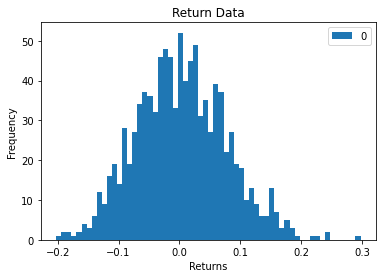

In [11]:
ret = df_data.pct_change()
ret.plot.hist(bins=60)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Return Data')
plt.show()
#plt.hist

## Cumulative Return

After looking at the daily returns chart we can conclude that the returns are a bit volatile and the stock can move +/- 6% on any given day. Moreover, the distribution seems to be left-skewed as we have more extremes on this part of the distribution. To get a sense of how extreme the returns can be we can plot a histogram. 

Here is another important concept in finance: `Cumulative return`. To calculate the growth of our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the `cumsum()` function.

In [13]:
lst = [1, 2, 3, 4, 5]
np.cumprod(lst)

array([  1,   2,   6,  24, 120])

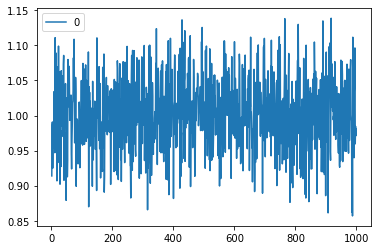

In [15]:
cum_returns = (ret+1).cumprod()
cum_returns.plot()
plt.show()

This plot exhibit the cumulative returns since for a random variable. In words, one could have made around $1 on a $1 investment during investment period. That is quite a stagnant performance.

## Covariance

Covariance is a measure for detecting the extent to which two random variables jointly vary. Covariance allows us to quantify the degree of dependence of two random variables.

The covariance between random variables X and Y can be defined as:

$$Cov(X,Y)=\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]$$
or
$$Cov(X,Y)=\mathbb{E}(XY)-\mu_X\mu_Y$$

where $\mu_X \text{ and } \mu_Y$ are the means of the random variables X and Y, respectively.

* A covariance,$\sigma_{XY}$, of 0 indicates that X and Y are unrelated
* A covariance greater than 0 indicates that X and Y are positively related
* A covariance less than 0 indicates that X and Y are negatively related

In [17]:
stocks = pd.read_csv('stocks.csv')
stocks = stocks.set_index('Date')
stocks.head()

,AAPL,^GSPC
Date,,
2020-12-31,132.690002,3756.070068
2021-01-04,129.410004,3700.649902
2021-01-05,131.009995,3726.860107
2021-01-06,126.599998,3748.139893
2021-01-07,130.919998,3803.790039


In [18]:
np.cov(stocks['AAPL'], stocks['^GSPC'])

array([[  298.79043907,  3825.98097368],
       [ 3825.98097368, 77452.52662594]])

Note that off-diagonal elements  shows the covariance between total Apple and S&P-500, which is 3825. The diagonal entries, on the other hand, indicates the variance of Apple and S&P-500, which are 298 and 77452, respectively.

For more information for the `numpy.cov()` module, please refer to this [website](https://numpy.org/doc/stable/reference/generated/numpy.cov.html).

## 3.4. Correlation

Correlation can be thought of as a normalized version of covariance so that correlation measures both strength and direction of the linear relationship between two random variables. Whereas covariance reflects the units of both random variables. 

$$\rho=\frac{\sigma_{xy}}{\sigma_x\sigma_y}$$

Correlation coefficient, $\rho$, tells is the characteristics of the relationship. $\rho$ takes on values between -1 and 1.

* If $\rho_{XY}$>0, then X and Y are positively correlated
* If $\rho_{XY}$<0, then X and Y are negatively correlated
* If $\rho_{XY}$=0, then X and Y are linearly uncorrelated (Maybe correlated in higher dimensions)
* If $\rho_{XY}$=1, then X and Y are perfectly positively correlated
* If $\rho_{XY}$=-1, then X and Y are perfectly negatively correlated


Let me dig more into non-linear relations. To do that, I will take 2 variables, namely `X` and `Y`.

In [19]:
X = np.array((-3, -2, -1, 1, 2, 3))
Y = np.array((9, 4, 1, 1, 4, 9))

In [20]:
np.corrcoef(X,Y)

array([[ 1.00000000e+00, -2.07660451e-17],
       [-2.07660451e-17,  1.00000000e+00]])

The formula for Pearson's correlation coefficient results in zero. But, it is clearly visible that both the variables are dependent. Here the relation is defined as "variable Y is the square of variable X". This is not a linear relation.

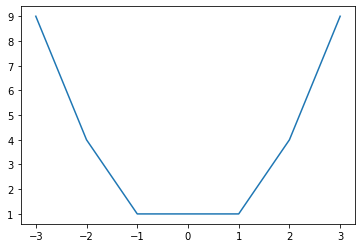

In [21]:
plt.plot(X, Y);

`Seaborn` has a fancy tool for displaying the correlation called `heatmap`. For the sake of easiness, `annot=True` argument can be used.

In [22]:
stocks.corr()

,AAPL,^GSPC
AAPL,1.00000,0.79532
^GSPC,0.79532,1.00000


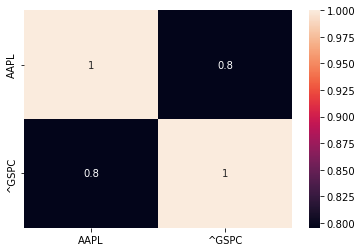

In [24]:
sns.heatmap(stocks.corr(),annot=True);

I can rescaling the color bar by using three arguments: 
* `vmin`, which is the minimum value of the bar;
* `vmax`, which is the maximum value of the bar; and 
* `center` 

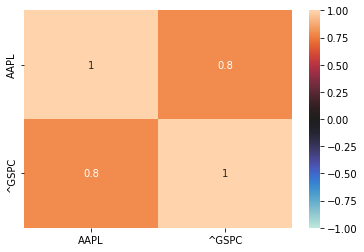

In [25]:
sns.heatmap(stocks.corr(),annot=True, vmin=-1, vmax=1, center=0);

## 2.5. Risk-Return Relation

The ultimate aim of investments is to get positive return and return is the gain made on an investment in a  given period of time. As you can imagine, there is a trade-off between risk and return, that is to say the higher risk assumed, the greater the return realized. As it is a formidable task to come up with a optimum solution, this trade-off is one of the most controversial issues in finance.

Investors prefer the get positive return at the expense of the lowest risk. At a given level of risk, the investment with highest level of return is the best choice. Let's try to understand the risk-return relationship via interactive plot in Python.

In [26]:
import statsmodels.api as sm
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [28]:
aapl = pd.read_csv('apple.csv')
aapl = aapl.set_index('Date')

,Date,Close
0,2019-12-31,73.412498
1,2020-01-02,75.087502
2,2020-01-03,74.357498
3,2020-01-06,74.949997
4,2020-01-07,74.597504


In [29]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    399 non-null    object 
 1   Close   399 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [35]:
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl = aapl.set_index('Date')

In [37]:
aapl_ret = aapl.pct_change()


In [43]:
window = 5
aapl_vol = aapl_ret.rolling(window).std().dropna()

In [45]:
aapl_vol['Close'].corr(aapl_ret['Close'])

-0.008227106315772307

In [47]:
aapl_ret

,Close
Date,
2019-12-31,NaN
2020-01-02,0.022816
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
...,...
2021-07-26,0.002895
2021-07-27,-0.014900
2021-07-28,-0.012196


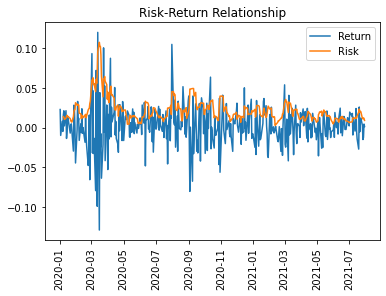

In [51]:
plt.plot(aapl_ret.index, aapl_ret['Close'], label='Return')
plt.plot(aapl_vol.index, aapl_vol['Close'], label='Risk')
plt.title('Risk-Return Relationship')
plt.legend()
plt.xticks(rotation=90)
plt.show()